In [15]:
from mppi import Utilities as U, Parsers as P
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition,inset_axes
import numpy as np
from scipy.signal import argrelextrema
import scipy.optimize
import yaml

# Plots

This notebook collects the script for the plots.

## Decay constant from the echo peaks

We measure the physical dephasing time from the height and time position of the echo peaks.

In [134]:
file = 'Results/echo_decay.yaml'
eta = 4e-4

In [135]:
with open(file, 'r') as f:
    data_loaded = yaml.safe_load(f)
data_loaded.keys()

dict_keys(['echo', 'ref', 'time'])

In [136]:
time = np.array(data_loaded['time'])
ref = np.array(data_loaded['ref'])
echo = data_loaded['echo']

for tau in echo:
    echo[tau] = np.array(echo[tau])

In [137]:
echo.keys()

dict_keys(['0.5ps', '0ps', '1.5ps', '1ps', '2.5ps', '2ps'])

We build the expected exponential decay of the polarization, starting from the its peak

In [138]:
ind_max = np.argmax(ref)
pol_peak = ref[ind_max]
time_exp = time[ind_max:]
exp_decay = pol_peak*np.exp(-eta*(time_exp-time_exp[0]))

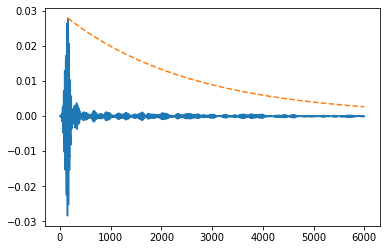

In [139]:
plt.plot(time,ref)
plt.plot(time_exp,exp_decay,linestyle='--')

We perform the exponential fit of the echo peaks.

We do not include the signal due to the echo pulse the starts at t=0. We compute the time postions at the 
echo peaks and we fit the associated curve with an single exponential decay

In [140]:
tau = ['0.5ps','1ps','1.5ps','2ps','2.5ps']

In [167]:
time_peak = []
signal_peak = []
for t in tau:
    time_peak.append(time[np.argmax(echo[t])])
    signal_peak.append(max(echo[t]))
t0 = time_peak[0]
time_fit = time[np.where(time == t0)[0][0]:]

In [168]:
signal_peak

[9.16570748970522e-05,
 5.688687976579995e-05,
 3.825820530477677e-05,
 2.557306779672351e-05,
 1.7559662331048902e-05]

In [169]:
def monoExp(t, x0):
    return x0*np.exp(-eta*(t-t0))

In [170]:
p0 = (1.5e-4) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, time_peak, signal_peak, p0)
x0 = params[0]
x0

8.861098997430812e-05

In [171]:
exp_fit = monoExp(time_fit,x0)

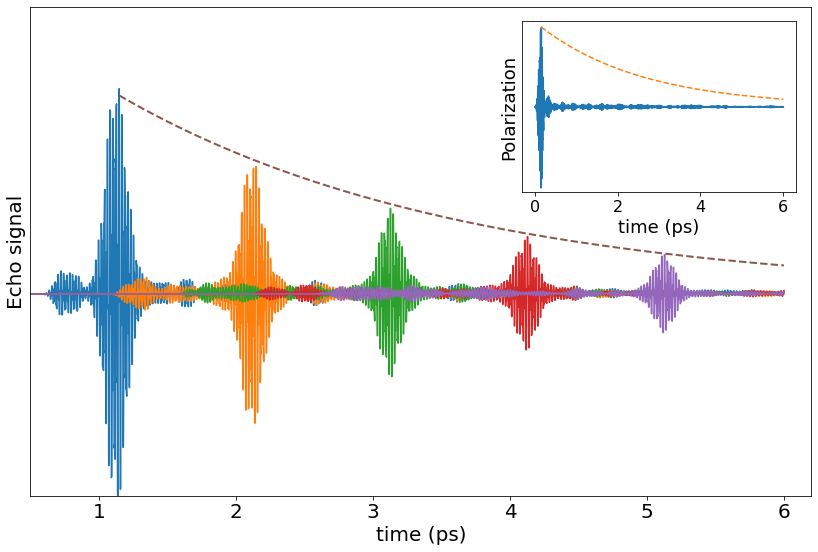

In [182]:
label_size = 20
label_size_inset = 18
e_min = min(echo['0.5ps'])*1.
e_max = max(echo['0.5ps'])*1.4

fig, ax1 = plt.subplots(figsize=(14, 9))

for t in tau:
    ax1.plot(time*1e-3,echo[t],label='echo_'+t)
ax1.plot(time_fit*1e-3,exp_fit,linestyle='--',linewidth=2)
#ax1.scatter(np.array(time_peak)*1e-3,signal_peak,linewidth=4)
#for tm in time_peak:
#    ax1.axvline(tm*1e-3,ymax=(monoExp(tm,x0)-e_min)/(e_max-e_min),color='black',ls='--') #
ax1.set_xlabel('time (ps)',size=label_size)
ax1.set_ylabel('Echo signal',size=label_size)
ax1.set_xlim(0.5,6.2)
ax1.set_ylim(e_min,e_max)
ax1.set_yticks([])
ax1.tick_params(axis='both', which='major', labelsize=label_size)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.63,0.62,0.35,0.35])
ax2.set_axes_locator(ip)
ax2.plot(time*1e-3,ref)
ax2.plot(time_exp*1e-3,exp_decay,linestyle='--')
ax2.set_yticks([])
ax2.set_ylim(-0.03,0.03)
ax2.set_xlabel('time (ps)',size=label_size_inset)
ax2.set_ylabel('Polarization',size=label_size_inset)
ax2.tick_params(axis='both', which='major', labelsize=16)

#plt.savefig(fname='Plot/echo_decay.eps',format='eps',bbox_inches = "tight")

## Analysis of the echo peaks (without physical decay time)

We analyze the shape of the echo peaks in function of $\tau$ when no decay time is included in the computation.

This analysis is useful to assess the efficiency of the echo signal retrieval and to compare the numerical results with
the ones derived from the analytical perturbation theory

In [16]:
file = 'Results/echo_no_decay.yaml'

In [17]:
with open(file, 'r') as f:
    data_loaded = yaml.safe_load(f)
data_loaded.keys()

dict_keys(['echo', 'profile', 'ref', 'time', 'time_output'])

In [20]:
data_loaded['echo'].keys()

dict_keys(['0.5ps', '0ps', '1.5ps', '1ps', '2.5ps', '2ps'])

In [18]:
time = np.array(data_loaded['time'])
time_output = np.array(data_loaded['time_output'])
ref = np.array(data_loaded['ref'])
echo = data_loaded['echo']
profile = data_loaded['profile']

for tau in echo:
    echo[tau] = np.array(echo[tau])
    profile[tau] = np.array(profile[tau])

KeyError: '0ps'

In [194]:
ind_first_peak = np.argmax(ref)
time_first_peak = time[ind_first_peak]
time_first_peak

157.5

In [186]:
echo.keys()

dict_keys(['0.5ps', '0ps', '1.5ps', '1ps', '2.5ps', '2ps'])

We do not include the signal due to the echo pulse the starts at t=0.

We compute the time postions at the echo peaks

In [187]:
tau = ['0.5ps','1ps','1.5ps','2ps','2.5ps']

In [188]:
time_peak = []
signal_peak = []
for t in tau:
    time_peak.append(time[np.argmax(echo[t])])
    signal_peak.append(max(echo[t]))
t0 = time_peak[0]
time_fit = time[np.where(time == t0)[0][0]:]

In [189]:
signal_peak

[0.0001316480156243846,
 0.00011820345796022857,
 0.00011329948527498797,
 0.00010967564412315475,
 0.00010874674633247924]

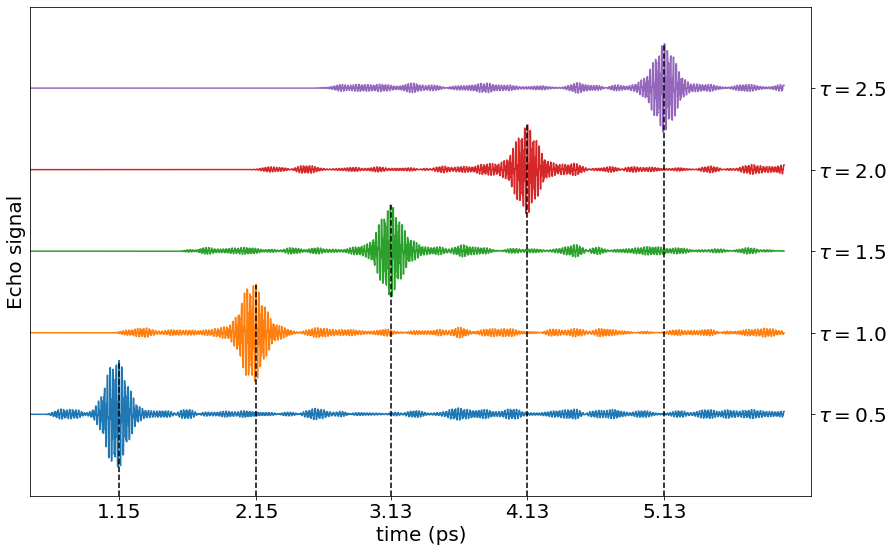

In [200]:
tau_disp = [r'$\tau=0.5$',r'$\tau=1.0$',r'$\tau=1.5$',r'$\tau=2.0$',r'$\tau=2.5$']
label_size = 20
e_min = -2e-4
e_max = 1e-3
shift = 2e-4
ypos=0

fig, ax1 = plt.subplots(figsize=(14, 9))

for t in tau:
    ax1.plot(time*1e-3,ypos+echo[t])
    ypos+=shift
ypos = 0
for t,v in zip(time_peak,signal_peak):
    ax1.axvline(t*1e-3,ymax=(ypos+v-e_min)/(e_max-e_min),color='black',ls='--')
    #ax1.text(t*1e-3+0.1,e_min/1.5,'$t_M$=%s'%str(t*1e-3),size=label_size)
    ypos+=shift
ax1.set_xlabel('time (ps)',size=label_size)
ax1.set_ylabel('Echo signal',size=label_size)
ax1.set_xlim(0.5,6.2)
ax1.set_ylim(e_min,e_max)
#ax1.set_yticks([])
ax1.set_yticks([shift*i for i in range(len(tau_disp))])
ax1.set_yticklabels(tau_disp,size=label_size)
ax1.yaxis.tick_right()
ax1.set_xticks([t*1e-3 for t in time_peak])
ax1.set_xticklabels([str(round(t*1e-3, 2)) for t in time_peak],size=label_size)
ax1.tick_params(axis='both', which='major', labelsize=label_size)

#plt.savefig(fname='Plot/echo_analysis.eps',format='eps',bbox_inches = "tight")

and the peak of the first pulse is at

In [197]:
time_first_peak

157.5